In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = r"C:\Data_for_learning_overall\data_machine_learning\hr data\HR_comma_sep.csv"
df = pd.read_csv(file_path)
print(df.head())

  Department  satisfaction_level  last_evaluation  number_project  \
0      sales                0.38             0.53               2   
1      sales                0.80             0.86               5   
2      sales                0.11             0.88               7   
3      sales                0.72             0.87               5   
4      sales                0.37             0.52               2   

   average_montly_hours  time_spend_at_company  Work_accident  \
0                   157                      3              0   
1                   262                      6              0   
2                   272                      4              0   
3                   223                      5              0   
4                   159                      3              0   

   any_promotion_last_5years  salary  left  
0                          0     low     1  
1                          0  medium     1  
2                          0  medium     1  
3             

In [2]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}, Distinct Values: {unique_values}")

Column: Department, Distinct Values: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Column: satisfaction_level, Distinct Values: [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
Column: last_evaluation, Distinct Values: [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 

# EDA 

Let start with correlation!

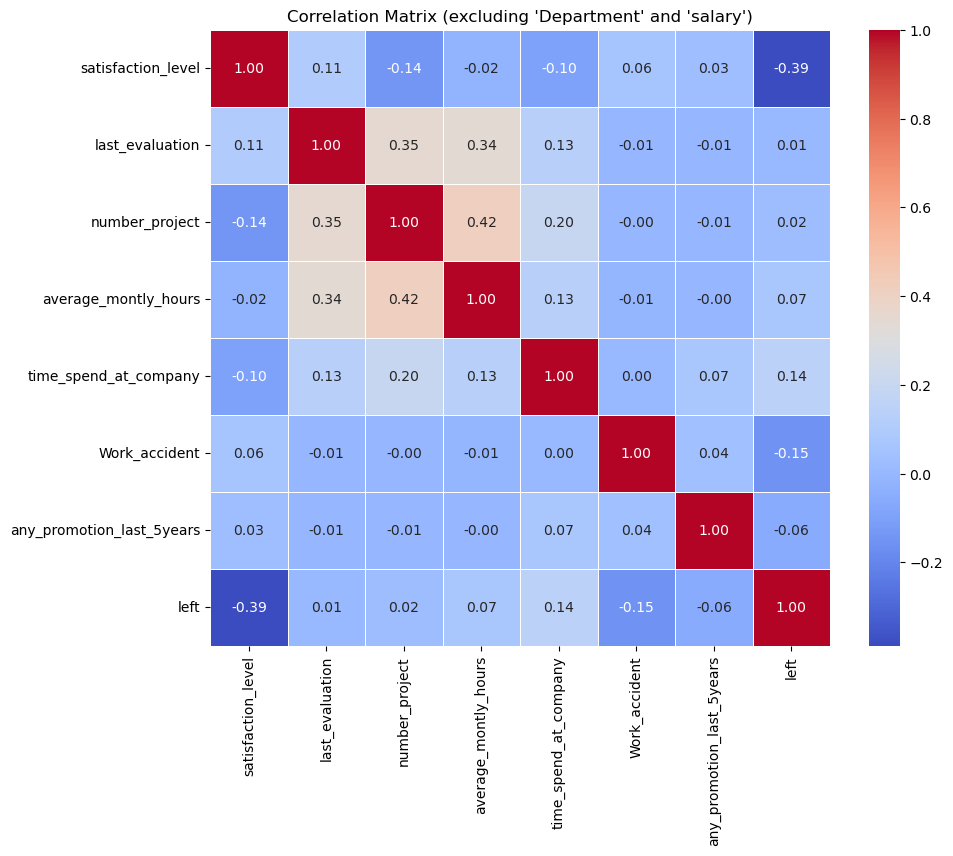

In [3]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
columns_to_exclude = ['Department', 'salary']
numerical_columns = [col for col in numerical_columns if col not in columns_to_exclude]
subset_df = df[numerical_columns]
correlation_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix (excluding 'Department' and 'salary')")
plt.show()

It's seems like all the column dont have too many correlation to the left variables. This might because of outliers. 

Let's look at every single variables. 


## Department

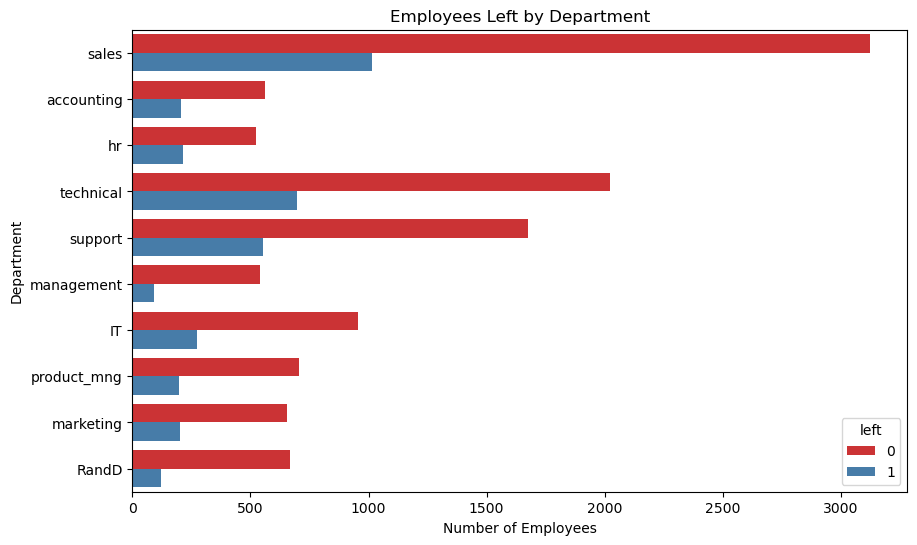

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='Department', hue='left', data=df, palette='Set1')
plt.title('Employees Left by Department')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.show()


In [5]:
# Assuming 'df' is your DataFrame
department_counts = df['Department'].value_counts()

# Display the counts
print("Distinct Values of Department and Their Counts:")
print(department_counts)


Distinct Values of Department and Their Counts:
Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


In [6]:
# Calculate the left percentage for each department
left_percentage = df.groupby('Department')['left'].mean() * 100

# Display the results
print("Left Percentage for Each Department:")
print(left_percentage)


Left Percentage for Each Department:
Department
IT             22.249389
RandD          15.374841
accounting     26.597132
hr             29.093369
management     14.444444
marketing      23.659674
product_mng    21.951220
sales          24.492754
support        24.899058
technical      25.625000
Name: left, dtype: float64


In [7]:
# Calculate the left percentage
left_percentage = df['left'].mean() * 100

# Display the result
print(f"Left Percentage: {left_percentage:.2f}%")


Left Percentage: 23.81%


Most department have a left percentage different to the Average left percentage so Department seems to have impact on where employees left or not. 

# Satisfaction_level

In [8]:
# Assuming 'df' is your DataFrame
average_satisfaction = df['satisfaction_level'].mean()

# Display the result
print(f"Average Satisfaction Level: {average_satisfaction:.2f}")


Average Satisfaction Level: 0.61


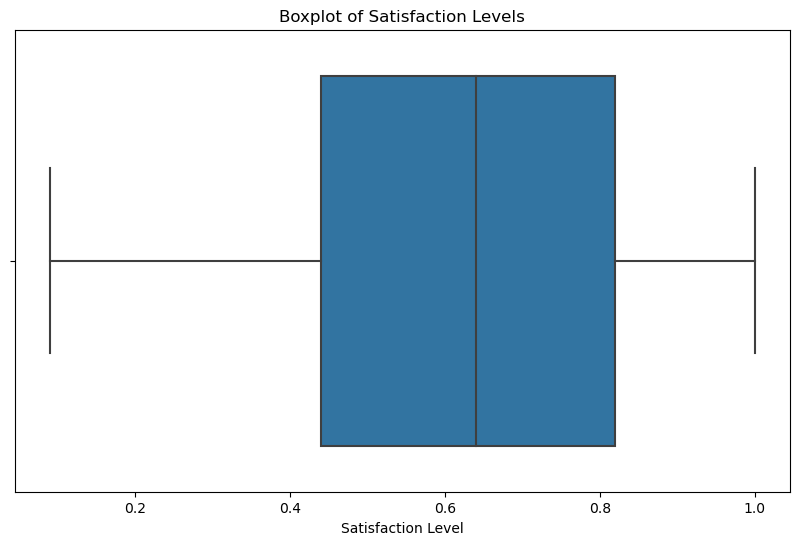

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['satisfaction_level'])
plt.title('Boxplot of Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.show()


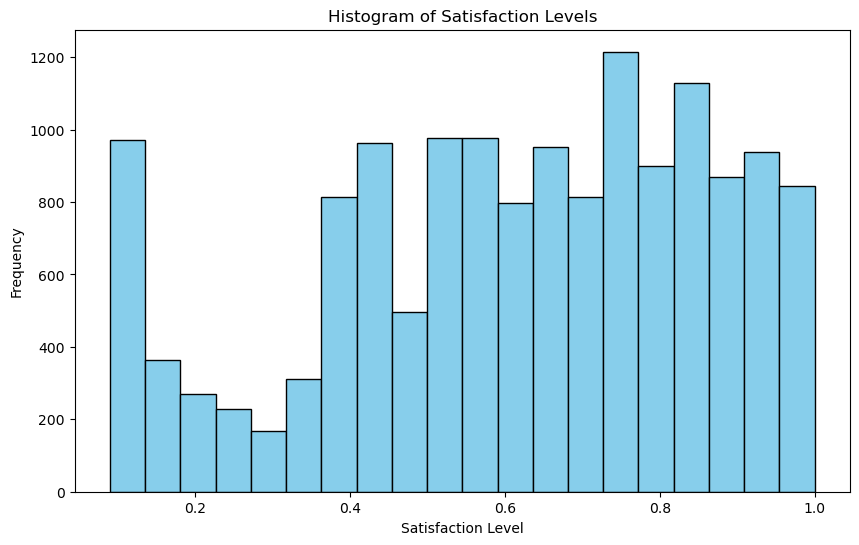

In [10]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
plt.hist(df['satisfaction_level'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()


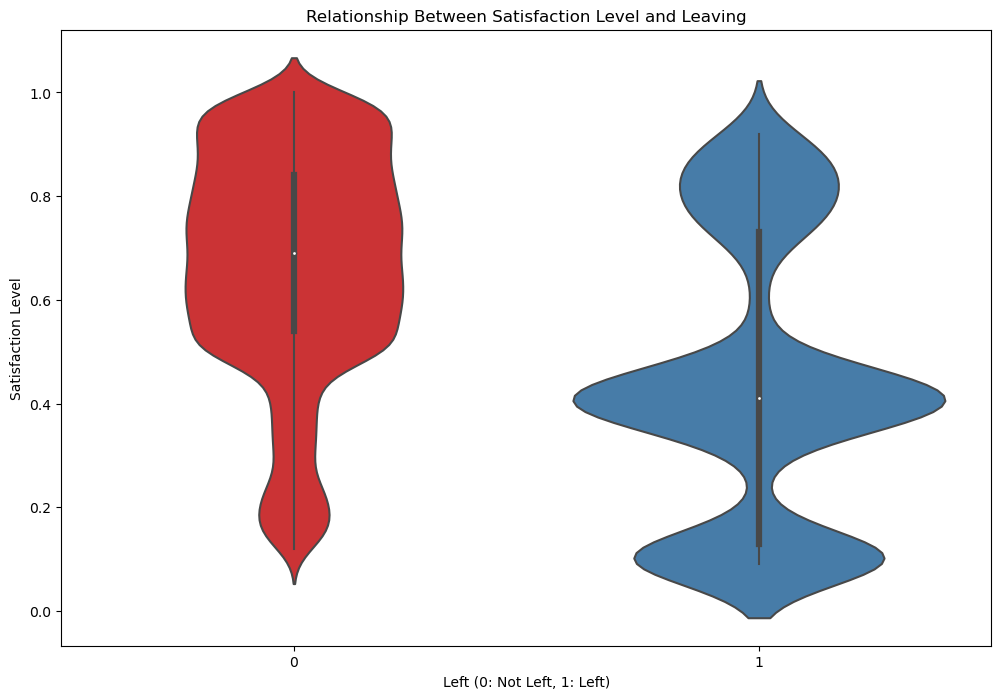

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 8))
sns.violinplot(x='left', y='satisfaction_level', data=df, palette='Set1')
plt.title('Relationship Between Satisfaction Level and Leaving')
plt.xlabel('Left (0: Not Left, 1: Left)')
plt.ylabel('Satisfaction Level')
plt.show()


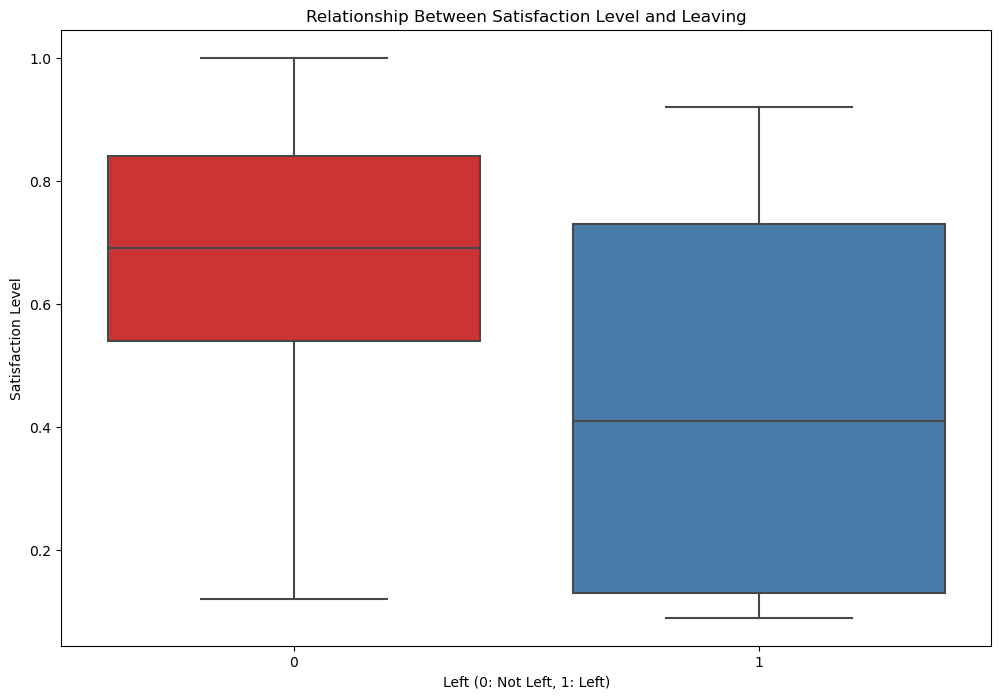

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='left', y='satisfaction_level', data=df, palette='Set1')
plt.title('Relationship Between Satisfaction Level and Leaving')
plt.xlabel('Left (0: Not Left, 1: Left)')
plt.ylabel('Satisfaction Level')
plt.show()


The satisfaction_level seems to have meaning base on the thing that most left employees have a satisfaction_level around 0.1 and under 0.6 (average) while employees that stays mostly have satisfaction level round 0.6 to above 0.8

# Last evaluation

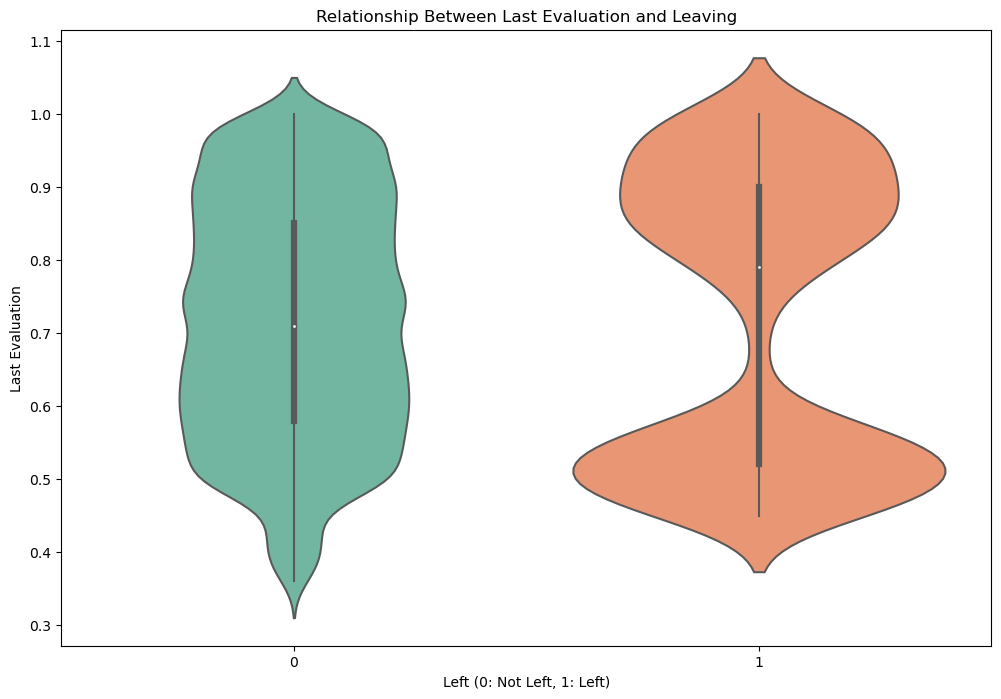

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 8))
sns.violinplot(x='left', y='last_evaluation', data=df, palette='Set2')
plt.title('Relationship Between Last Evaluation and Leaving')
plt.xlabel('Left (0: Not Left, 1: Left)')
plt.ylabel('Last Evaluation')
plt.show()


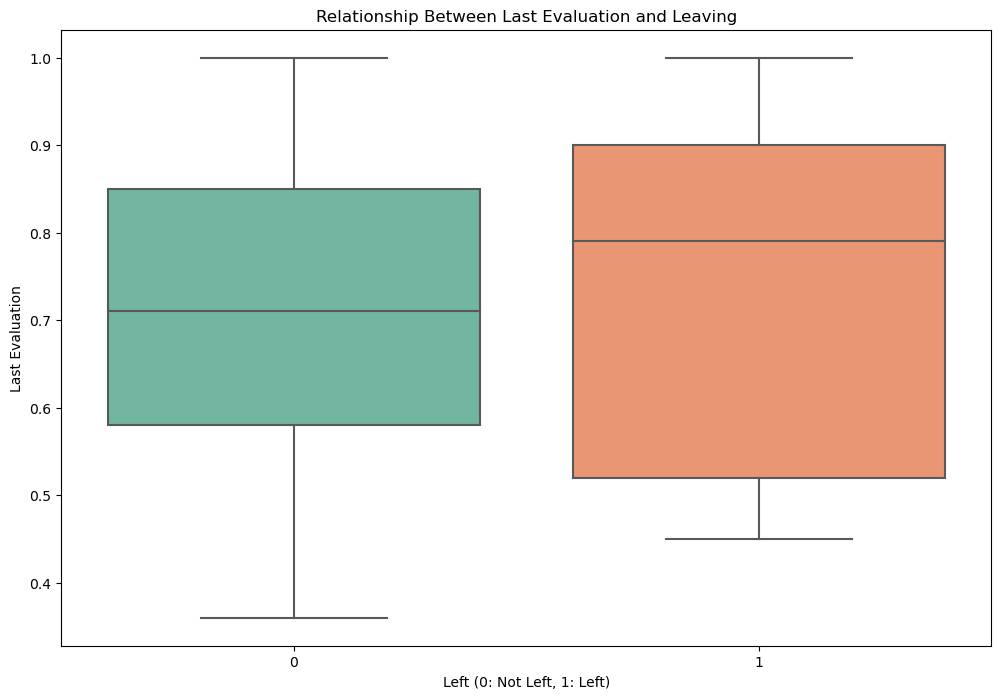

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='left', y='last_evaluation', data=df, palette='Set2')
plt.title('Relationship Between Last Evaluation and Leaving')
plt.xlabel('Left (0: Not Left, 1: Left)')
plt.ylabel('Last Evaluation')
plt.show()


# Number Project

Distinct Values of 'number_project' and Their Counts:
number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

Average Number of Projects per Employee: 3.80


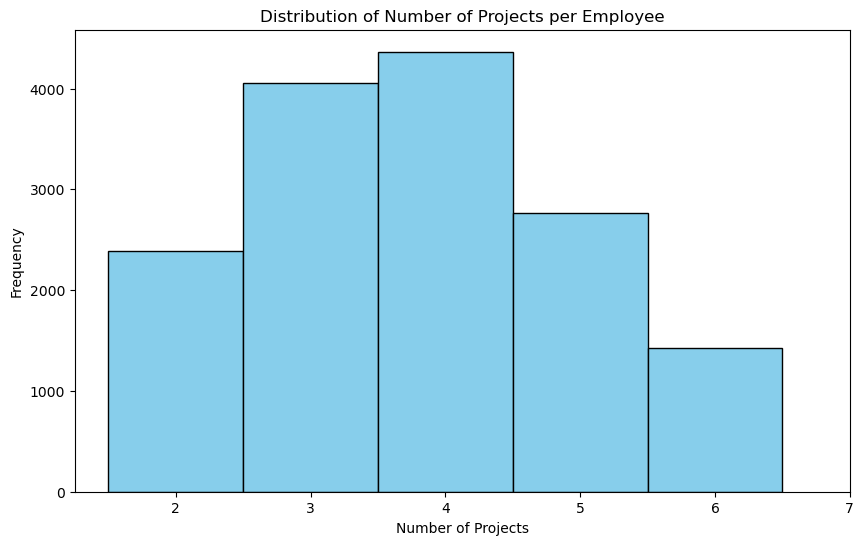

In [15]:
import matplotlib.pyplot as plt

# Count distinct values of 'number_project'
distinct_projects = df['number_project'].nunique()

# Display the distinct values
print("Distinct Values of 'number_project' and Their Counts:")
print(df['number_project'].value_counts())

# Calculate the average number of projects per employee
average_projects_per_employee = df['number_project'].mean()

# Display the result
print(f"\nAverage Number of Projects per Employee: {average_projects_per_employee:.2f}")

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['number_project'], bins=range(2, 8), align='left', color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Projects per Employee')
plt.xlabel('Number of Projects')
plt.ylabel('Frequency')
plt.xticks(range(2, 8))
plt.show()


Most employees have done 3-4 project. Now let see the left rate of employees.

Left Rate for Each Number of Projects:
number_project
2     65.619765
3      1.775586
4      9.369989
5     22.165882
6     55.792164
7    100.000000
Name: left, dtype: float64


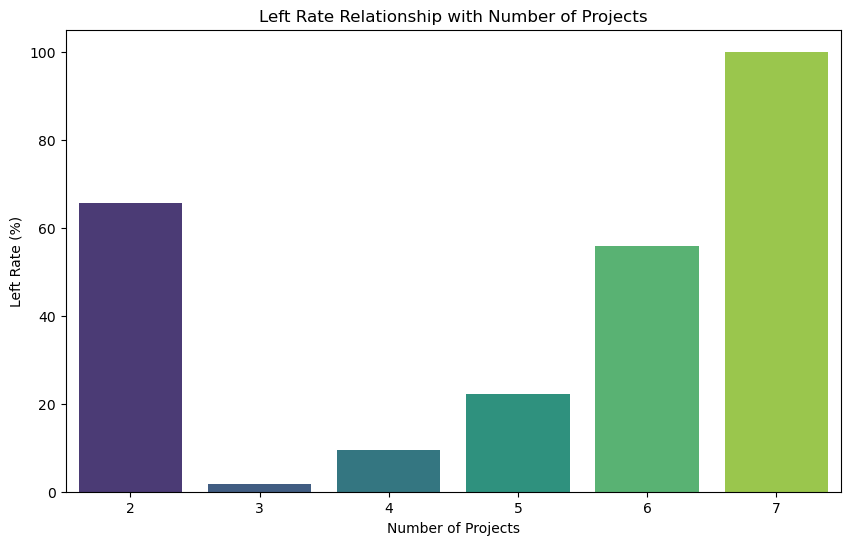

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate left rate for each number of projects
left_rate_by_project = df.groupby('number_project')['left'].mean() * 100

# Display the result
print("Left Rate for Each Number of Projects:")
print(left_rate_by_project)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=left_rate_by_project.index, y=left_rate_by_project.values, palette='viridis')
plt.title('Left Rate Relationship with Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Left Rate (%)')
plt.show()


The number gives an interesting insight here, employees who have done 6 and 2 projects have over 50% of quitting while that of 7 projects is 100%

# average_montly_hours


In [17]:
# Count distinct values of 'average_montly_hours'
distinct_hours = df['average_montly_hours'].nunique()

# Display the distinct values
print("Distinct Values of 'average_montly_hours' and Their Counts:")
print(df['average_montly_hours'].value_counts())

# Calculate the average monthly hours for all employees
average_monthly_hours = df['average_montly_hours'].mean()

# Display the result
print(f"\nAverage Monthly Hours for All Employees: {average_monthly_hours:.2f} hours")


Distinct Values of 'average_montly_hours' and Their Counts:
average_montly_hours
135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: count, Length: 215, dtype: int64

Average Monthly Hours for All Employees: 201.05 hours


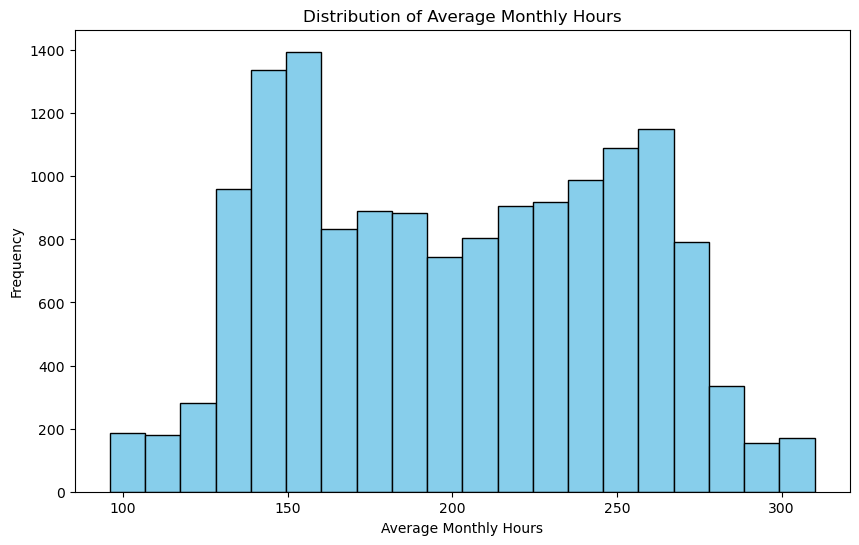

In [18]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
plt.hist(df['average_montly_hours'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()


Left Rate for Each Monthly Hours Group:
monthly_hours_group
<150       35.959253
150-200    13.205043
200-250    15.315528
>250       38.370684
Name: left, dtype: float64


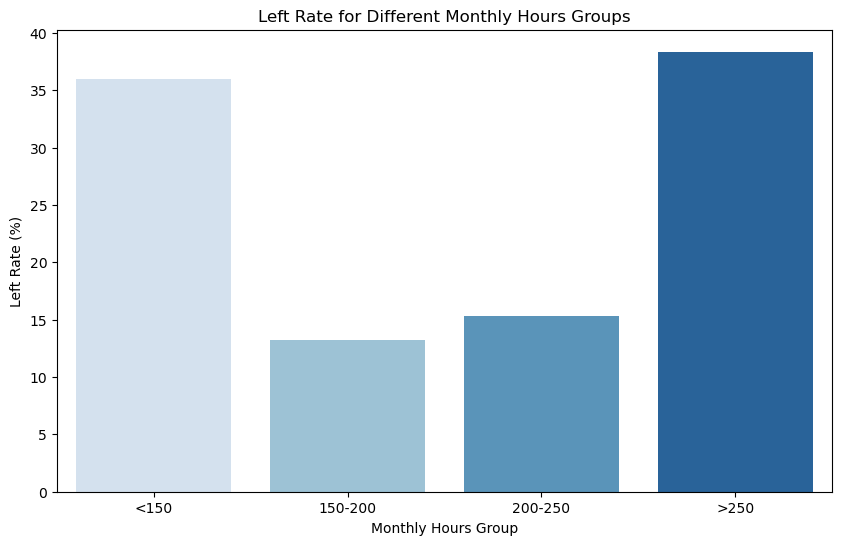

In [19]:
# Define the bins
bins = [0, 150, 200, 250, float('inf')]

# Define the corresponding labels
labels = ['<150', '150-200', '200-250', '>250']

# Create the new column
df['monthly_hours_group'] = pd.cut(df['average_montly_hours'], bins=bins, labels=labels, right=False)

# Calculate the left rate for each group
left_rate_by_hours_group = df.groupby('monthly_hours_group')['left'].mean() * 100

# Display the result
print("Left Rate for Each Monthly Hours Group:")
print(left_rate_by_hours_group)

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(x=left_rate_by_hours_group.index, y=left_rate_by_hours_group.values, palette='Blues')
plt.title('Left Rate for Different Monthly Hours Groups')
plt.xlabel('Monthly Hours Group')
plt.ylabel('Left Rate (%)')
plt.show()


# Time spend at the company

Distinct Values of 'time_spend_at_company' and Their Counts:
time_spend_at_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64


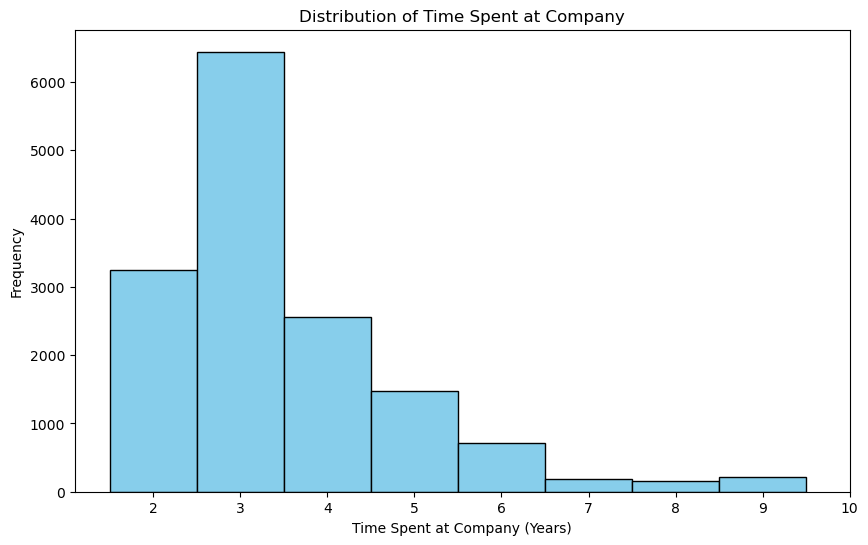

In [20]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Count distinct values of 'time_spend_at_company'
distinct_time_spent = df['time_spend_at_company'].nunique()

# Display the distinct values
print("Distinct Values of 'time_spend_at_company' and Their Counts:")
print(df['time_spend_at_company'].value_counts())

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['time_spend_at_company'], bins=range(2, 11), align='left', color='skyblue', edgecolor='black')
plt.title('Distribution of Time Spent at Company')
plt.xlabel('Time Spent at Company (Years)')
plt.ylabel('Frequency')
plt.xticks(range(2, 11))
plt.show()


Left Rate for Each Time Spent at Company:
time_spend_at_company
2      1.633785
3     24.615862
4     34.806414
5     56.551256
6     29.108635
7      0.000000
8      0.000000
10     0.000000
Name: left, dtype: float64


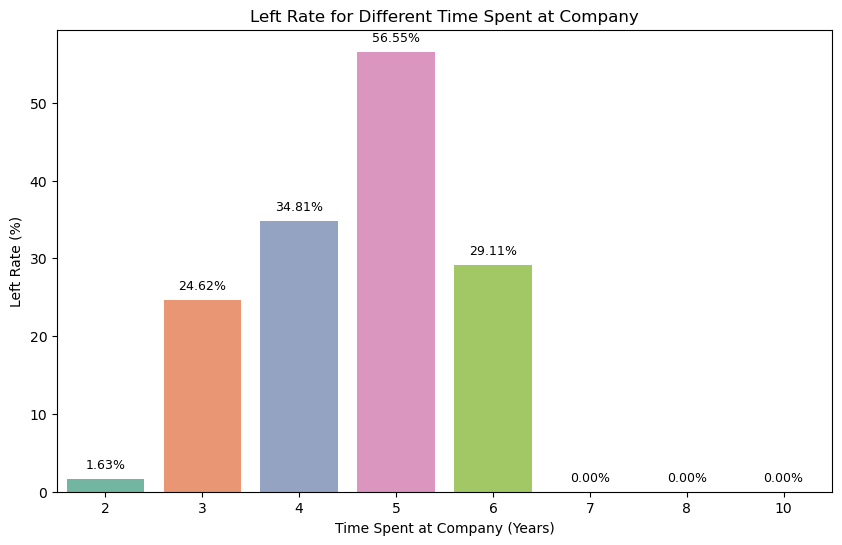

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Calculate left rate for each time spent at company
left_rate_by_time_spent = df.groupby('time_spend_at_company')['left'].mean() * 100

# Display the result
print("Left Rate for Each Time Spent at Company:")
print(left_rate_by_time_spent)

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(x=left_rate_by_time_spent.index, y=left_rate_by_time_spent.values, palette='Set2')
plt.title('Left Rate for Different Time Spent at Company')
plt.xlabel('Time Spent at Company (Years)')
plt.ylabel('Left Rate (%)')

# Display the left rate values on top of the bars
for index, value in enumerate(left_rate_by_time_spent.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()


The chart shows that employees whos been working from 4-5 years have the highest chance to leave the company.

# Work_accident


In [22]:
# Count distinct values of 'Work_accident'
distinct_work_accident = df['Work_accident'].nunique()

# Display the distinct values
print("Distinct Values of 'Work_accident' and Their Counts:")
print(df['Work_accident'].value_counts())

# Calculate the Work_accident percentage
work_accident_percentage = (df['Work_accident'].mean() * 100)

# Display the result
print(f"\nPercentage of Employees with Work Accident: {work_accident_percentage:.2f}%")


Distinct Values of 'Work_accident' and Their Counts:
Work_accident
0    12830
1     2169
Name: count, dtype: int64

Percentage of Employees with Work Accident: 14.46%


In [23]:
# Calculate the percentage of employees with Work_accident=1 who left
left_percentage_with_work_accident = (df[df['Work_accident'] == 1]['left'].mean() * 100)

# Calculate the percentage of employees with Work_accident=0 who left
left_percentage_without_work_accident = (df[df['Work_accident'] == 0]['left'].mean() * 100)

# Display the results
print(f"Percentage of Employees with Work_accident and Left: {left_percentage_with_work_accident:.2f}%")
print(f"Percentage of Employees with None Work_accident=0 and Left: {left_percentage_without_work_accident:.2f}%")


Percentage of Employees with Work_accident and Left: 7.79%
Percentage of Employees with None Work_accident=0 and Left: 26.52%


It shows that the Work_accident have nothing to deal with left rate.
In later steps, i might exclude this variables and compared it to when included.

In [24]:
# Count distinct values of 'any_promotion_last_5years'
distinct_promotion_values = df['any_promotion_last_5years'].nunique()

# Display the distinct values
print("Distinct Values of 'any_promotion_last_5years' and Their Counts:")
print(df['any_promotion_last_5years'].value_counts())

# Calculate the promotion percentage
promotion_percentage = (df['any_promotion_last_5years'].mean() * 100)

# Display the result
print(f"\nPercentage of Employees with Promotion in the Last 5 Years: {promotion_percentage:.2f}%")


Distinct Values of 'any_promotion_last_5years' and Their Counts:
any_promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

Percentage of Employees with Promotion in the Last 5 Years: 2.13%


In [25]:
# Calculate the percentage of employees leaving when any_promotion_last_5years = 0
left_percentage_no_promotion = (df[df['any_promotion_last_5years'] == 0]['left'].mean() * 100)

# Calculate the percentage of employees leaving when any_promotion_last_5years = 1
left_percentage_with_promotion = (df[df['any_promotion_last_5years'] == 1]['left'].mean() * 100)

# Display the results
print(f"Percentage of Employees Leaving with No Promotion: {left_percentage_no_promotion:.2f}%")
print(f"Percentage of Employees Leaving with Promotion: {left_percentage_with_promotion:.2f}%")


Percentage of Employees Leaving with No Promotion: 24.20%
Percentage of Employees Leaving with Promotion: 5.96%


# Salary

In [26]:
# Count distinct values of 'salary'
distinct_salary_values = df['salary'].nunique()

# Display the distinct values
print("Distinct Values of 'salary' and Their Counts:")
print(df['salary'].value_counts())

# Calculate the percentage of each salary category
salary_percentage = (df['salary'].value_counts() / len(df)) * 100

# Display the result
print("\nPercentage of Each Salary Category:")
print(salary_percentage)

# Calculate the percentage of leaving for each salary category
left_percentage_by_salary = df.groupby('salary')['left'].mean() * 100

# Display the result
print("\nPercentage of Employees Leaving by Salary Category:")
print(left_percentage_by_salary)


Distinct Values of 'salary' and Their Counts:
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

Percentage of Each Salary Category:
salary
low       48.776585
medium    42.976198
high       8.247216
Name: count, dtype: float64

Percentage of Employees Leaving by Salary Category:
salary
high       6.628941
low       29.688354
medium    20.431275
Name: left, dtype: float64


In [27]:
# Ordinal encoding for 'salary'
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}

# Apply the mapping to the 'salary' column
df['salary_encoded'] = df['salary'].map(salary_mapping)

# Display the updated DataFrame
print(df[['salary', 'salary_encoded']].head())


   salary  salary_encoded
0     low               1
1  medium               2
2  medium               2
3     low               1
4     low               1


In [30]:
df

,Department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_at_company,Work_accident,any_promotion_last_5years,salary,left,monthly_hours_group,salary_encoded
0,sales,0.38,0.53,2,157,3,0,0,low,1,150-200,1
1,sales,0.80,0.86,5,262,6,0,0,medium,1,>250,2
2,sales,0.11,0.88,7,272,4,0,0,medium,1,>250,2
3,sales,0.72,0.87,5,223,5,0,0,low,1,200-250,1
4,sales,0.37,0.52,2,159,3,0,0,low,1,150-200,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,support,0.40,0.57,2,151,3,0,0,low,1,150-200,1
14995,support,0.37,0.48,2,160,3,0,0,low,1,150-200,1
14996,support,0.37,0.53,2,143,3,0,0,low,1,<150,1
14997,support,0.11,0.96,6,280,4,0,0,low,1,>250,1


In [33]:
# Assuming 'df' is your DataFrame
df = df.drop('monthly_hours_group', axis=1)
print(df)


      Department  satisfaction_level  last_evaluation  number_project  \
0          sales                0.38             0.53               2   
1          sales                0.80             0.86               5   
2          sales                0.11             0.88               7   
3          sales                0.72             0.87               5   
4          sales                0.37             0.52               2   
...          ...                 ...              ...             ...   
14994    support                0.40             0.57               2   
14995    support                0.37             0.48               2   
14996    support                0.37             0.53               2   
14997    support                0.11             0.96               6   
14998    support                0.37             0.52               2   

       average_montly_hours  time_spend_at_company  Work_accident  \
0                       157                      3    

In [36]:
# Assuming 'df' is your DataFrame
final_df = pd.get_dummies(df, columns=['Department'], prefix='dept',drop_first = True)

# Display the updated DataFrame with one-hot encoding
print(final_df.head())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_at_company  Work_accident  any_promotion_last_5years  salary  \
0                      3              0                          0     low   
1                      6              0                          0  medium   
2                      4              0                          0  medium   
3                      5              0                          0     low   
4                      3              0                          0     low   

   left  salary_encoded  dept_RandD  dept_accounti

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features (X) and Target (y)
X = final_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
              'time_spend_at_company', 'Work_accident', 'any_promotion_last_5years',
              'salary_encoded', 'dept_RandD', 'dept_accounting', 'dept_hr',
              'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
              'dept_support', 'dept_technical']]

y = final_df['left']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Display a message indicating that the model has been trained
print("Logistic Regression Model Trained Successfully!")


Logistic Regression Model Trained Successfully!


C:\Users\vanhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
model.score(X_test,y_test)

0.7794666666666666